In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
df = pd.read_csv('iris.csv')

In [22]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   145 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [24]:
#Eliminating any rows with null values in them
df = df[~df['petal.width'].isnull()]

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  145 non-null    float64
 1   sepal.width   145 non-null    float64
 2   petal.length  145 non-null    float64
 3   petal.width   145 non-null    float64
 4   Species       145 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


In [26]:
#Plots

C:\Users\0640299237\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


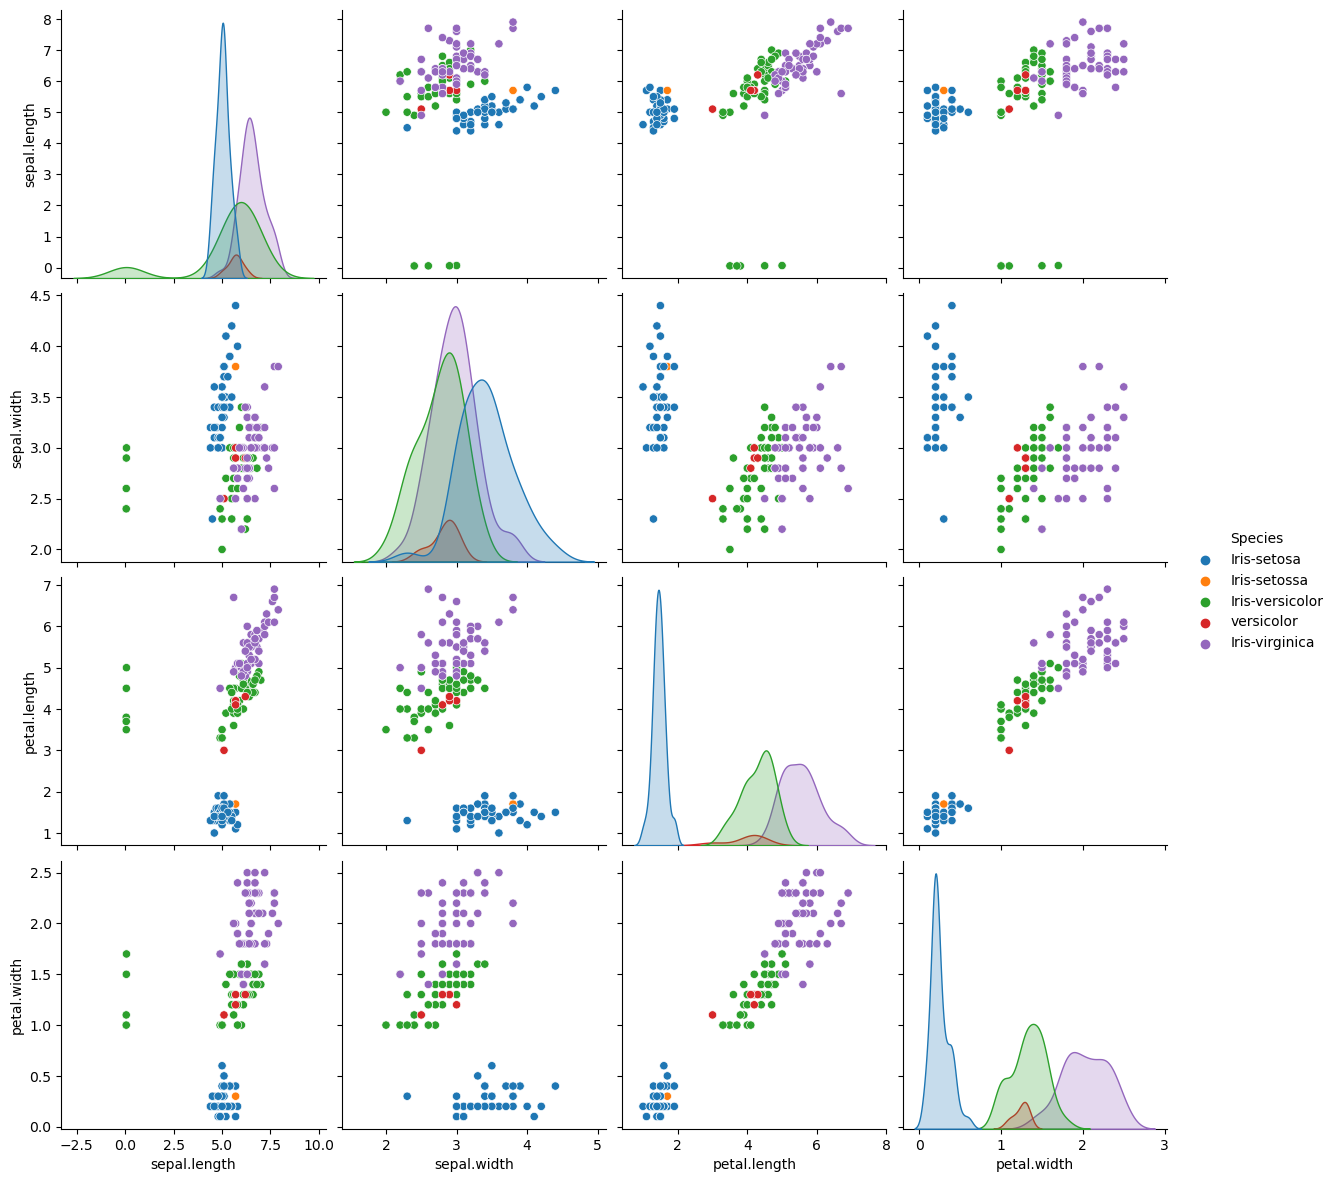

In [27]:
sns.pairplot(df, hue='Species', size=3)

In [28]:
#We can further investigate the abnormality in the Species name that is evidently noticeable from the plots.

In [29]:
df['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    45
Iris-setosa        44
versicolor          5
Iris-setossa        1
Name: Species, dtype: int64

# Logistic Regression

In [30]:
final_df = df.loc[df['Species'].ne('Iris-virginica')]

In [31]:
final_df.head()

,sepal.length,sepal.width,petal.length,petal.width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Outlier Check


C:\Users\0640299237\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


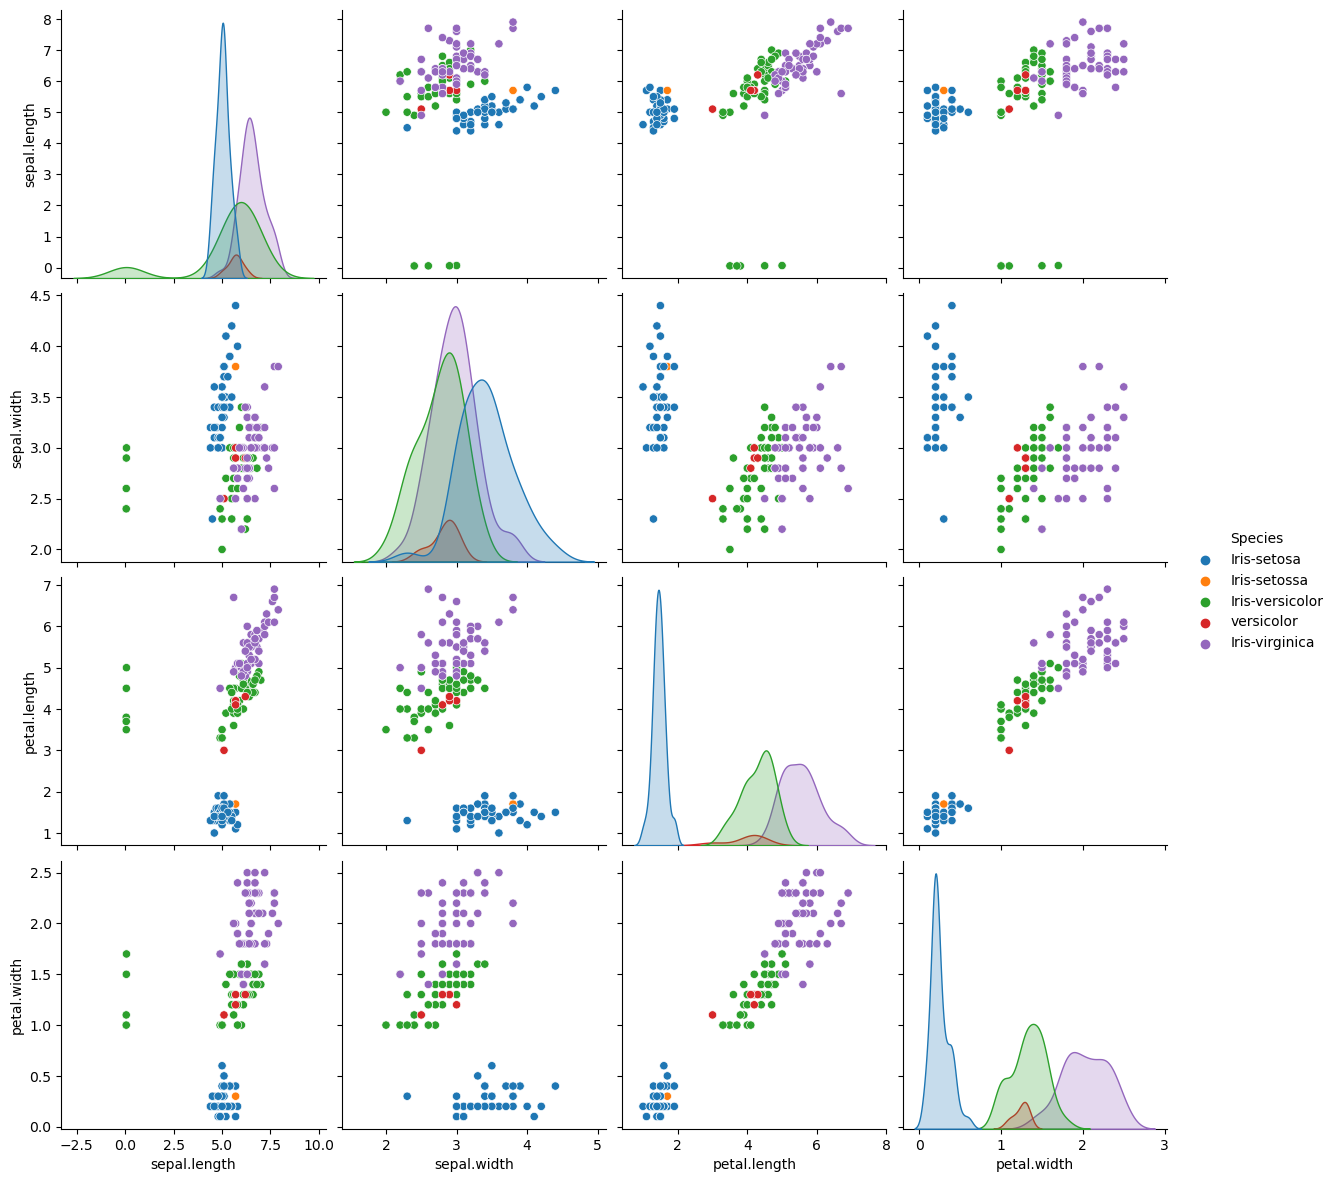

In [32]:
sns.pairplot(df, hue='Species', size=3)

In [33]:
#Based on the plot above, it appears that there may be outliers in both sepal.width and sepal.length. In order to confirm this suspicion, we will create separate plots for each variabl

SEPAL LENGTH

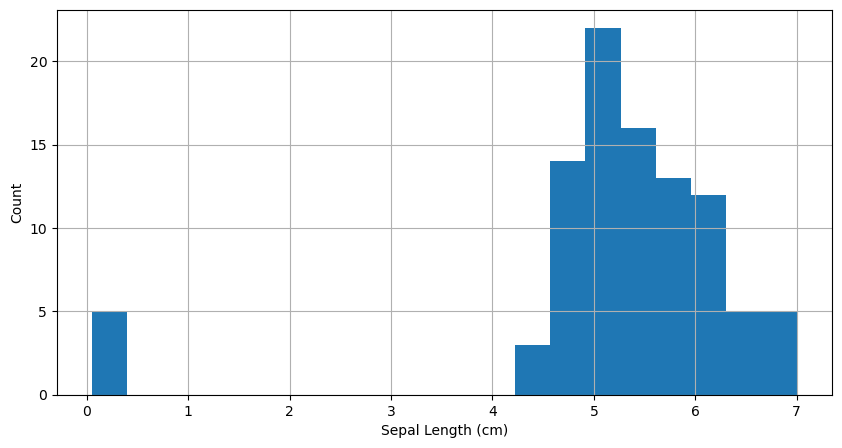

In [43]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(final_df['sepal.length'], bins=20)
ax.set_xlabel('Sepal Length (cm)')
ax.grid(True)
ax.set_ylabel('Count')
plt.show()

Upon examining the plot, it is evident that there are 5 data points with values below 1, indicating the presence of outliers. To remedy this issue, these data points will be assumed to be measured in meters and will be converted to centimeters by multiplying their values by 100.

In [44]:
# Identify the rows with sepal_length_cm below 1
outliers = final_df[final_df['sepal.length'] < 1]
outlier_indices = outliers.index

In [45]:
# Multiply the outlier values by 100 to convert from meters to centimeters
final_df.loc[outlier_indices, 'sepal.length'] *= 100

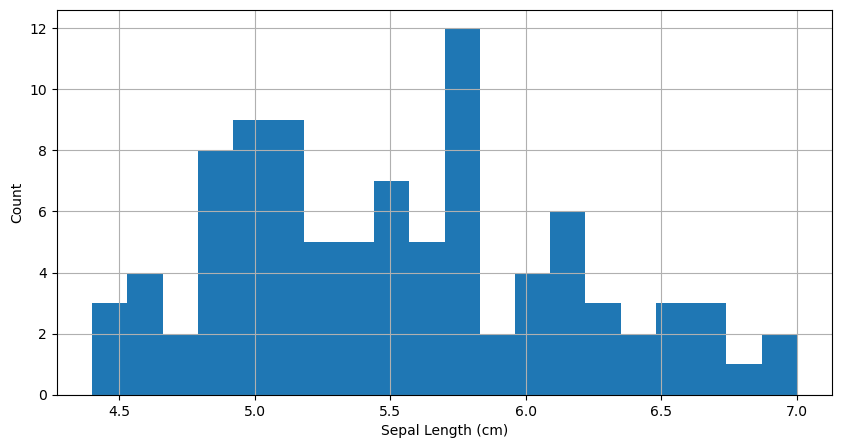

In [47]:
# Create a histogram of the corrected sepal_length_cm values
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(final_df['sepal.length'], bins=20)
ax.set_xlabel('Sepal Length (cm)')
ax.grid(True)
ax.set_ylabel('Count')
plt.show()

SEPAL WIDTH



In [49]:
final_df = final_df.drop(final_df[(final_df['Species'] == "Iris-setosa") & (final_df['sepal.width'] < 2.5)].index)

C:\Users\0640299237\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


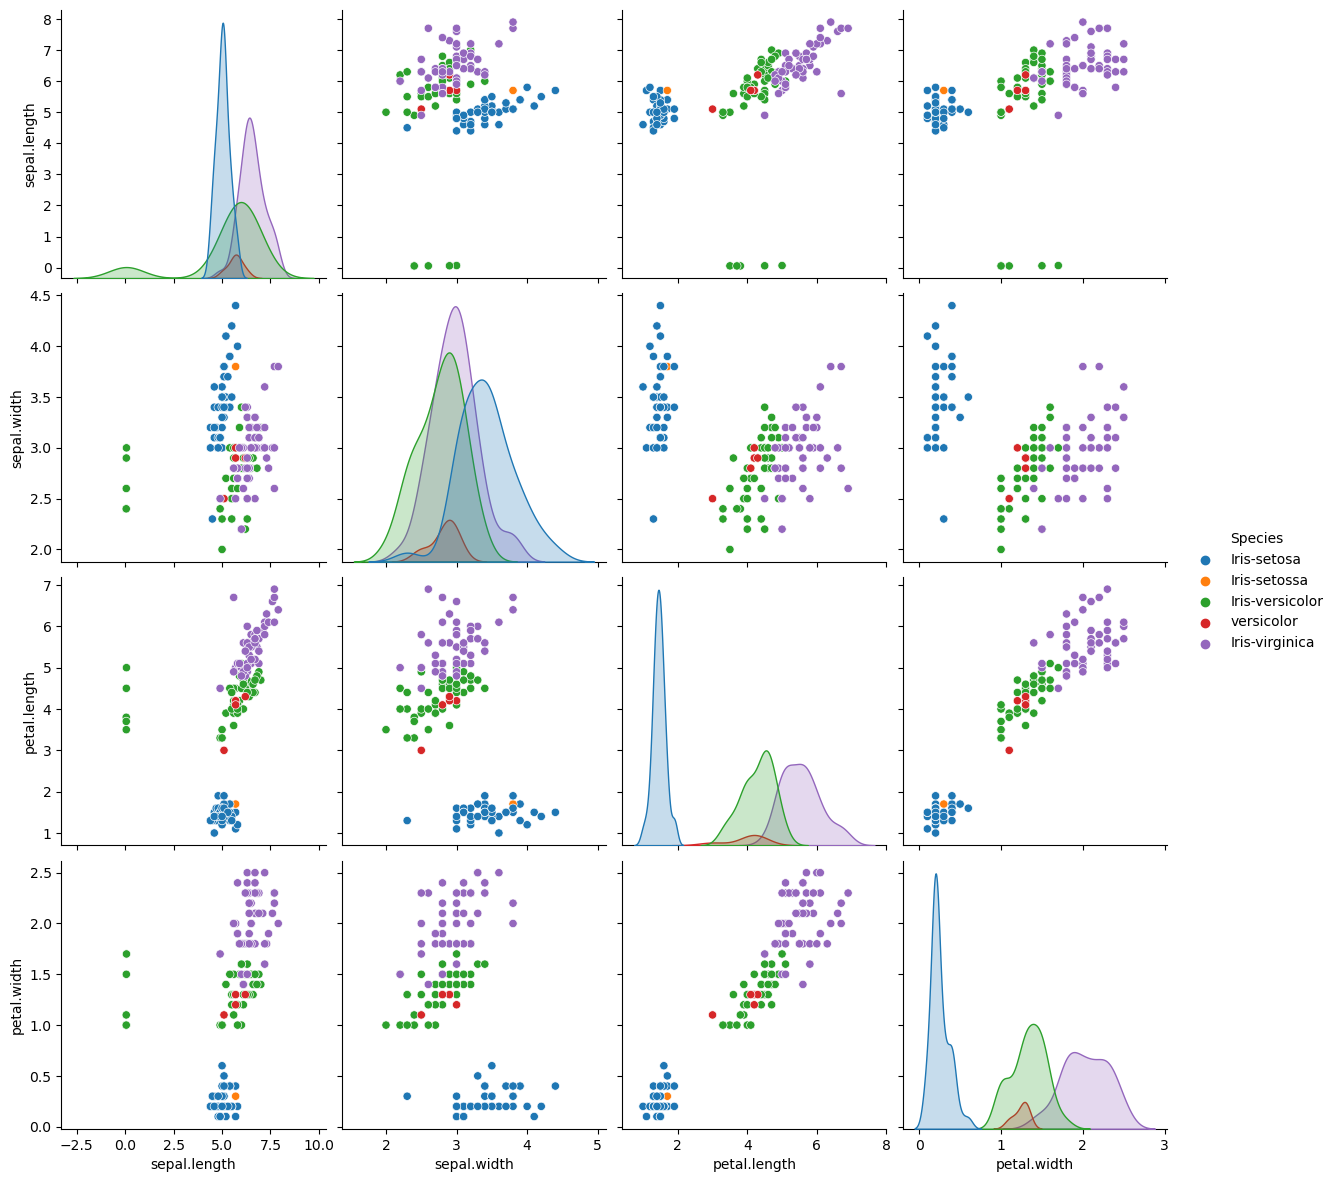

In [50]:
sns.pairplot(df, hue='Species', size=3)

The outliers have been successfully removed!